In [19]:
%matplotlib notebook
#!conda install -c coecms celluloid
#!conda install -c conda-forge python-wget
import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera
import scipy as sp
from scipy import integrate
import os.path as path
import wget

<IPython.core.display.Javascript object>


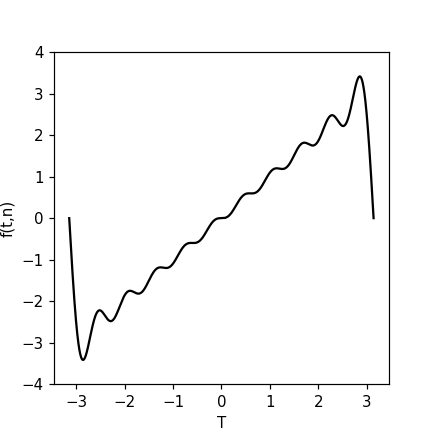

In [20]:
#1.2
def f(t,n):
    
    f = 2* ((-1)**(n-1))*np.sin(n*t)/n
    return f

L = np.pi
cicles = 1
t = np.linspace(-L, cicles*L,1000)

n = 1
nt = 50
F = 0

fig = plt.figure(figsize=(4,4))
camera = Camera(fig)

while n < nt:
    F += f(t,n)
    plt.plot(t,F,c='k')
    plt.xlabel("T")
    plt.ylabel("f(t,n)")
    camera.snap()
    n += 1 

animation = camera.animate()

In [3]:
#1.3 /Serie de Riemman

In [21]:
def GetRiemmanSix(T):
    f = lambda t: (t*(t**2 - np.pi**2)/12)**2
    R,_ = (integrate.quad(f, -T/2, T/2))
    
    return 2*R/T

In [22]:
GetRiemmanSix(2*np.pi)

1.0173430619844488

In [125]:
#1.4 
#Derivada espectral
f = lambda x: np.exp(-0.1*x)*np.sin(x)

dx = (4*np.pi)/100
x  = np.linspace(-2*np.pi, 2*np.pi, 100)
sample = f(x)

In [126]:
def GetFFT(sample):
    k = np.fft.fftfreq(len(sample))
    coef = np.fft.fft(sample)
    return k,coef

In [131]:
k, coef = GetFFT(sample)
j=(-1)**(0.5)
dfesp = np.fft.ifft(j*k*coef)*(len(k)/2)

In [128]:
#Derivada Derecha
def Dprog(f,x,dx):
    d=(f(x+dx)-f(x))/dx
    return d
dd = Dprog(f,x,dx)

In [129]:
#Derivada Exacta
df = lambda x: (np.exp(-0.1*x))*(np.cos(x)-0.1*np.sin(x))

<IPython.core.display.Javascript object>


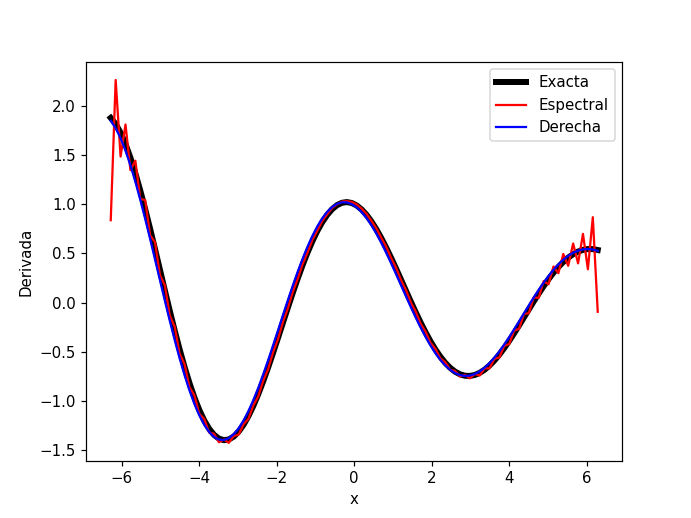

In [139]:
plt.xlabel('x')
plt.ylabel('Derivada')
plt.plot(x, df(x), label = 'Exacta', c = 'k', linewidth = 4)
plt.plot(x, dfesp.real, label = 'Espectral', c='r')
plt.plot(x, dd, label = 'Derecha', c = 'b')
plt.legend()
plt.show()

In [141]:
file = 'ManchasSolares.dat'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionales/ManchasSolares.dat'
if not path.exists(file):    
    Path_ = wget.download(url, file)
else:
    Path_ = file
print(' Descargado')


 Descargado


In [142]:
data = np.loadtxt(Path_)

In [143]:
fil = data[:,0]< 1900 
newData = data[fil==False] #Tomo los datos mayores e iguales a 1900
n=len(newData)
media = np.sum(newData[:,3])/n
fecha = (newData[:,0]+(newData[:,1]/12))
coef = np.fft.fft(newData[:,3]-media) 
k = np.fft.fftfreq(len(coef)) #Frecuencias

In [144]:
coefM = np.abs(coef)/n
k2 = k[0:int(n/2)]
coefM2  = 2.0*coefM[0:int(n/2)]

<IPython.core.display.Javascript object>


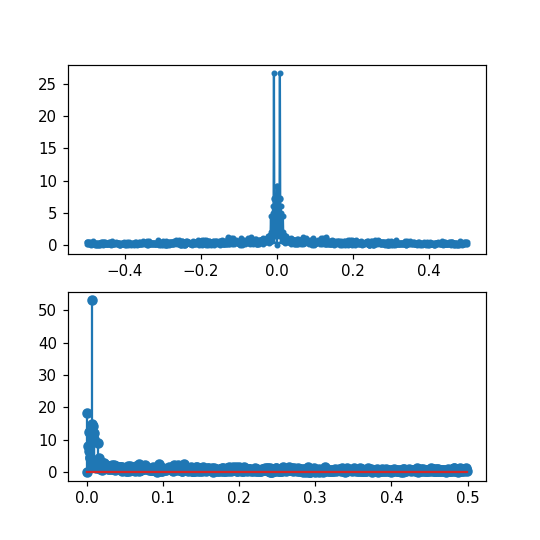

<StemContainer object of 3 artists>

In [145]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(2,1,1)
ax.plot(k, coefM, '.-')
ax1 = fig.add_subplot(2,1,2)
ax1.stem(k2,coefM2,use_line_collection=True)

In [146]:
#Periodo
ii = np.argmax(np.abs(coef)) #Halla la frecuencia dominante
freqP = k2[ii]  #Frecuencia principal
print((1/k2[ii])/12) #Periodo en años

10.666666666666666


In [147]:
mask1 = k > freqP #Se limpian los datos correspondientes a frecuencias que no son la principal
mask2 = k < freqP
coef[mask1] = 0
coef[mask2] = 0 

In [148]:
NewSample = np.fft.ifft(2*coef) 

<IPython.core.display.Javascript object>


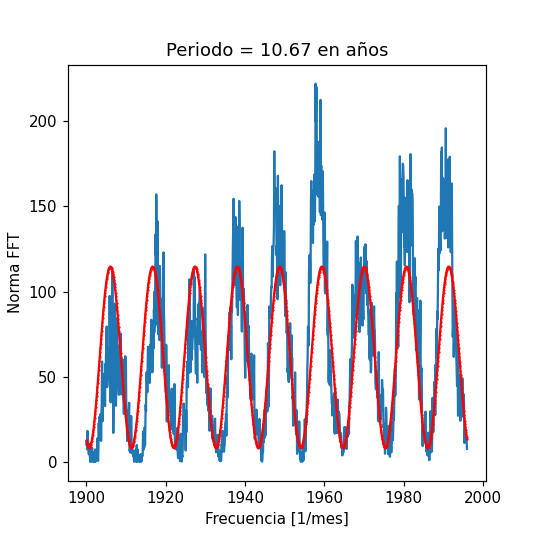

In [149]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Frecuencia [1/mes]")
ax.set_ylabel("Norma FFT")
ax.set_title("Periodo = 10.67 en años")
ax.plot(fecha, newData[:,3], label = "Datos")
ax.plot(fecha, np.real(NewSample)+media,'.-',label='Freq Dominante', c = 'r', markersize = 1) #se suma la media 